<a href="https://colab.research.google.com/github/M-H-Amini/DeepLearningCourse/blob/master/TFSingleLayerMNIST_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
**Written By Mohammad Hossein Amini (mhamini@aut.ac.ir)**
# Single-Layer Networks (From Scratch) for MNIST Digits

In this project, I'm gonna do all the stuff from scratch by tensorflow.

First of all, let's import modules...

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

TensorFlow 2.x selected.
2.0.0-rc0


# Loading Dataset
We're gonna use the MNIST dataset. There's one in tensorflow ready for us!!!

The **mnist** object would be of tensorflow Datasets type which makes our life easier...

In [2]:
mnist_train, info = tfds.load("mnist", split="train", with_info=True)
mnist_test = tfds.load("mnist", split="test")
print(info)
assert isinstance(mnist_train, tf.data.Dataset)
print("Extraction of images is complete.")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

Extraction of images is complete.


Let's see one of the elements of this dataset...

(28, 28, 1)
Label: 6


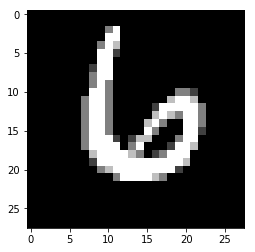

In [3]:
for mnist_example in mnist_train.shuffle(50000).take(1):  # Shuffle and take a single example
  image, label = mnist_example["image"], mnist_example["label"]
  print(image.shape)
  plt.imshow(image.numpy()[:, :, 0], cmap="gray")
  print("Label: {}".format(label.numpy()))

# Creating Model
As you know, the model would be a single layer network.


Time for defining variables...


*   **X** - The input images flattened
*   **W** - Weights of the first and the only layer
*   **b** - Biases of the first layer



In [0]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

def model(X, W, b):
  return tf.nn.softmax(tf.matmul(X,W) + b)

# Training Process
Now the loss would be defined and I would define `train_step` function to the training steps for each epoch.


In [0]:
optimizer = tf.keras.optimizers.Adam(0.01)

def loss(Y_, Y):
  return tf.reduce_sum(tf.losses.mean_squared_error(Y_, Y))

@tf.function
def train_step(X, Y_):
  with tf.GradientTape(persistent=True) as tape:
    Y = model(X, W, b)
    cost = loss(Y_, Y)
  gradients = tape.gradient(cost, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

And now arrives the training...

In [6]:
epochs = 10

for i in range(epochs):
  print('Epoch {}...'.format(i+1))
  mnist_train_batch = mnist_train.shuffle(50000).batch(128)
  counter = 0
  for batch in mnist_train_batch:
    counter += 1
    if not counter%10:
      print('\t Batch {} out of {}'.format(counter, 50))
    if counter >= 50:
      break
    X = tf.reshape(tf.Variable(batch['image'][:,:,:,0]) , [-1, 28*28])
    X = tf.cast(X, tf.float32)
    X = X / 255.
    Y_ = tf.Variable(batch['label'])
    Y_ = tf.cast(Y_, tf.float32)
    Y__ = np.zeros((128, 10))
    for i in range(128):
      Y__[i, Y_[i]] = 1
    Y_ = tf.Variable(Y__)
    Y_ = tf.cast(Y_, tf.float32)
    train_step(X, Y_)

Epoch 1...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 2...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 3...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 4...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 5...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 6...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 7...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 8...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 50
	 Batch 40 out of 50
	 Batch 50 out of 50
Epoch 9...
	 Batch 10 out of 50
	 Batch 20 out of 50
	 Batch 30 out of 5

# Testing Process
Time for testing the trained model...

Test 1 out of 100...


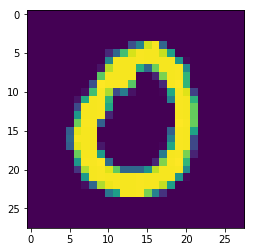

Actual:  0
Predicted:  0 

Test 2 out of 100...


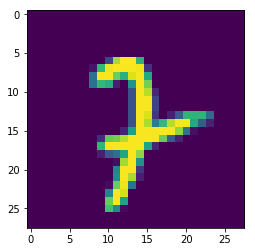

Actual:  7
Predicted:  7 

Test 3 out of 100...


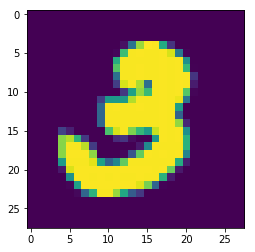

Actual:  3
Predicted:  3 

Test 4 out of 100...


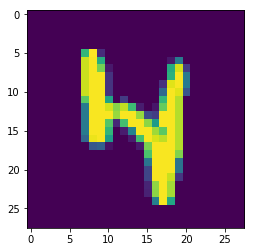

Actual:  4
Predicted:  4 

Test 5 out of 100...


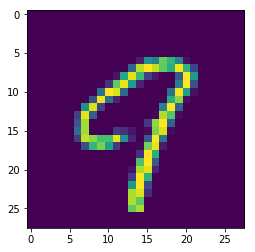

Actual:  9
Predicted:  9 

Test 6 out of 100...


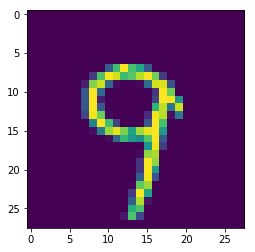

Actual:  9
Predicted:  9 

Test 7 out of 100...


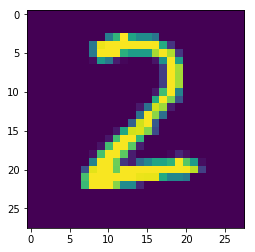

Actual:  2
Predicted:  2 

Test 8 out of 100...


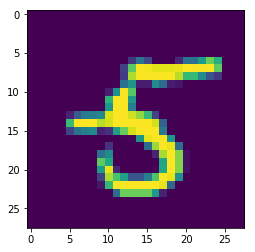

Actual:  5
Predicted:  5 

Test 9 out of 100...


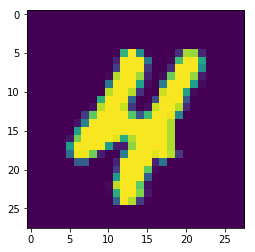

Actual:  4
Predicted:  4 

Test 10 out of 100...


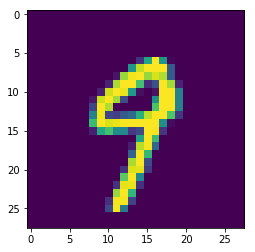

Actual:  9
Predicted:  9 

Test 11 out of 100...


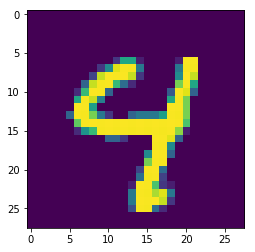

Actual:  4
Predicted:  4 

Test 12 out of 100...


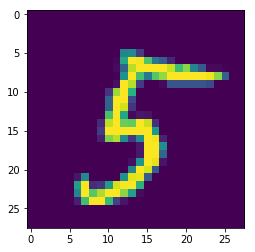

Actual:  5
Predicted:  5 

Test 13 out of 100...


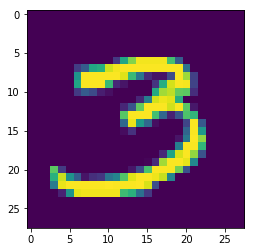

Actual:  3
Predicted:  3 

Test 14 out of 100...


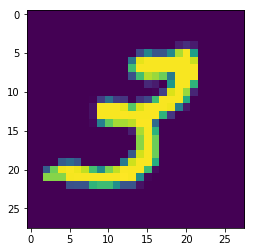

Actual:  3
Predicted:  3 

Test 15 out of 100...


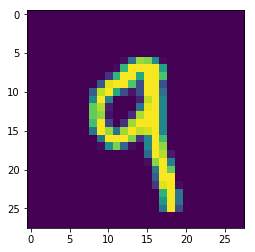

Actual:  9
Predicted:  9 

Test 16 out of 100...


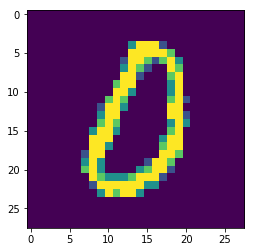

Actual:  0
Predicted:  0 

Test 17 out of 100...


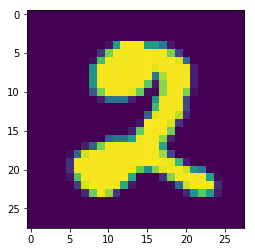

Actual:  2
Predicted:  2 

Test 18 out of 100...


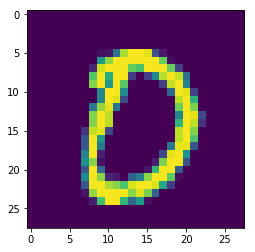

Actual:  0
Predicted:  0 

Test 19 out of 100...


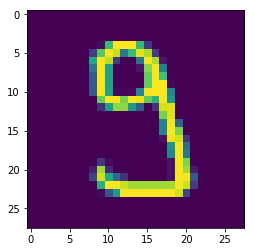

Actual:  9
Predicted:  3 

Test 20 out of 100...


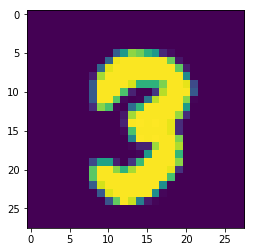

Actual:  3
Predicted:  3 

Test 21 out of 100...


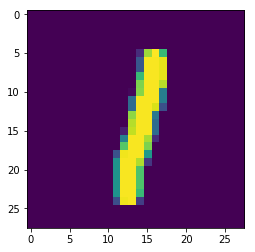

Actual:  1
Predicted:  1 

Test 22 out of 100...


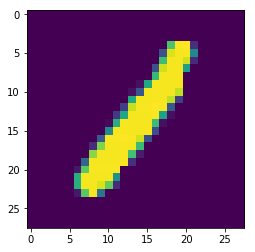

Actual:  1
Predicted:  1 

Test 23 out of 100...


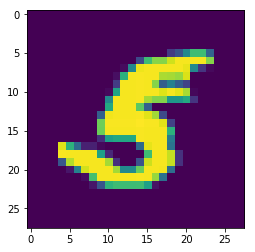

Actual:  5
Predicted:  3 

Test 24 out of 100...


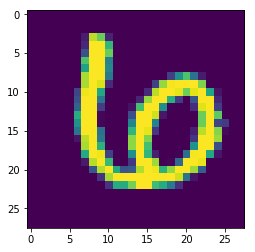

Actual:  6
Predicted:  6 

Test 25 out of 100...


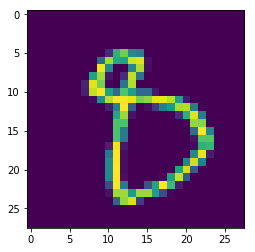

Actual:  8
Predicted:  8 

Test 26 out of 100...


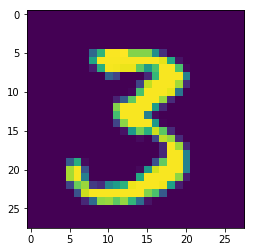

Actual:  3
Predicted:  3 

Test 27 out of 100...


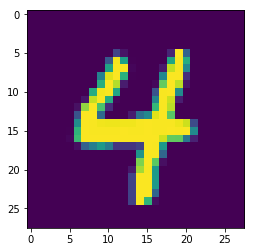

Actual:  4
Predicted:  4 

Test 28 out of 100...


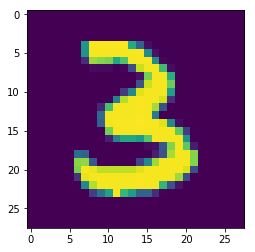

Actual:  3
Predicted:  3 

Test 29 out of 100...


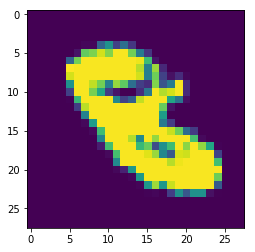

Actual:  8
Predicted:  2 

Test 30 out of 100...


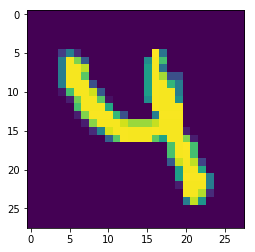

Actual:  4
Predicted:  4 

Test 31 out of 100...


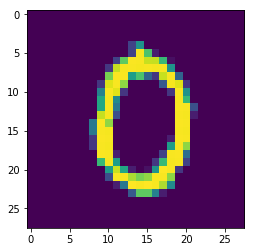

Actual:  0
Predicted:  0 

Test 32 out of 100...


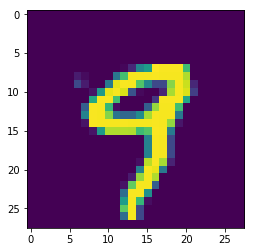

Actual:  9
Predicted:  9 

Test 33 out of 100...


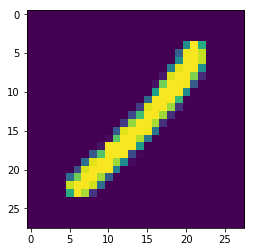

Actual:  1
Predicted:  1 

Test 34 out of 100...


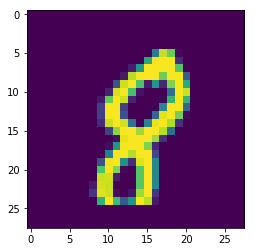

Actual:  8
Predicted:  8 

Test 35 out of 100...


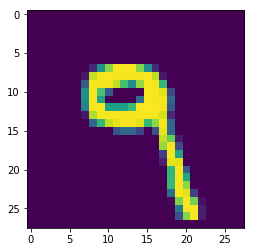

Actual:  9
Predicted:  9 

Test 36 out of 100...


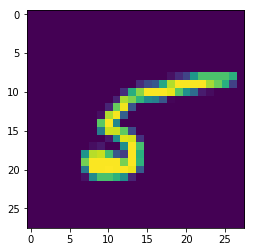

Actual:  5
Predicted:  5 

Test 37 out of 100...


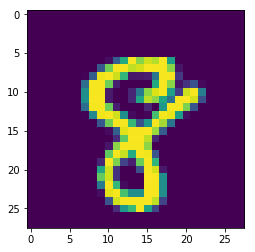

Actual:  8
Predicted:  8 

Test 38 out of 100...


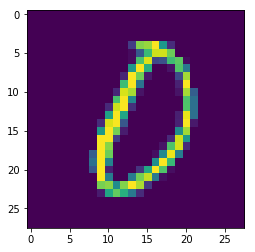

Actual:  0
Predicted:  0 

Test 39 out of 100...


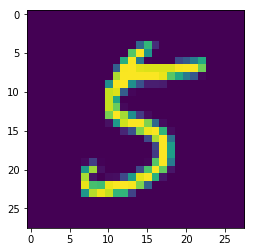

Actual:  5
Predicted:  5 

Test 40 out of 100...


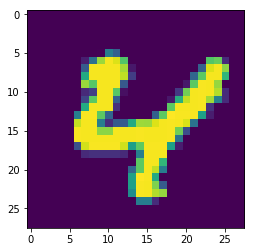

Actual:  4
Predicted:  4 

Test 41 out of 100...


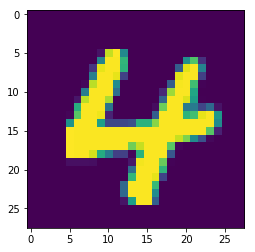

Actual:  4
Predicted:  4 

Test 42 out of 100...


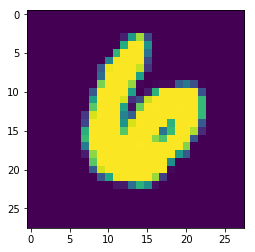

Actual:  6
Predicted:  6 

Test 43 out of 100...


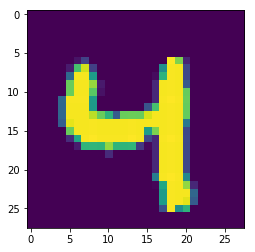

Actual:  4
Predicted:  4 

Test 44 out of 100...


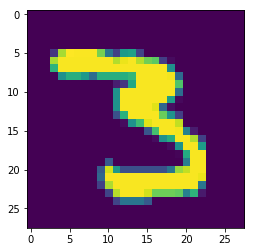

Actual:  3
Predicted:  3 

Test 45 out of 100...


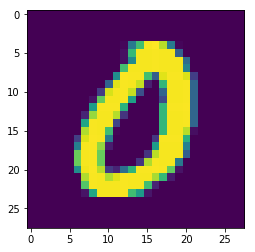

Actual:  0
Predicted:  0 

Test 46 out of 100...


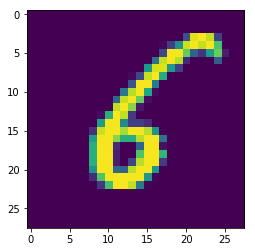

Actual:  6
Predicted:  6 

Test 47 out of 100...


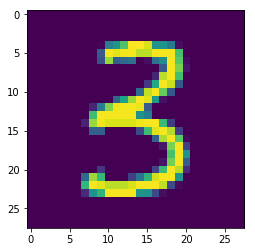

Actual:  3
Predicted:  3 

Test 48 out of 100...


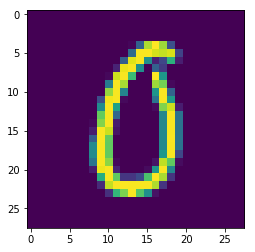

Actual:  0
Predicted:  0 

Test 49 out of 100...


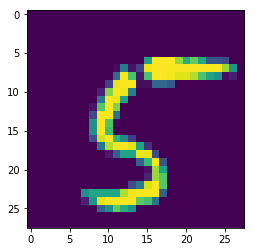

Actual:  5
Predicted:  5 

Test 50 out of 100...


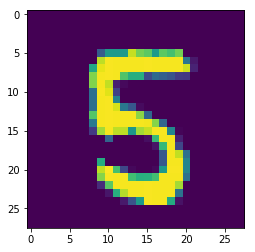

Actual:  5
Predicted:  5 

Test 51 out of 100...


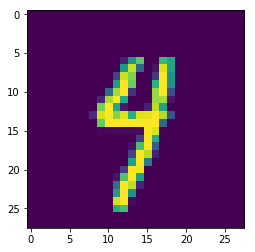

Actual:  4
Predicted:  4 

Test 52 out of 100...


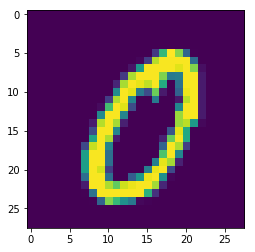

Actual:  0
Predicted:  0 

Test 53 out of 100...


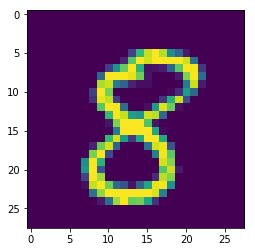

Actual:  8
Predicted:  8 

Test 54 out of 100...


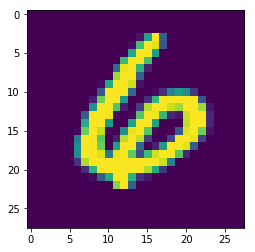

Actual:  6
Predicted:  6 

Test 55 out of 100...


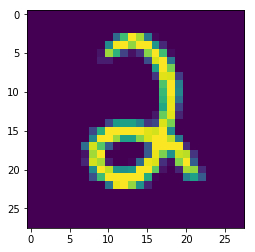

Actual:  2
Predicted:  2 

Test 56 out of 100...


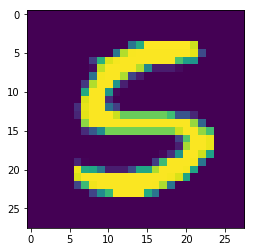

Actual:  5
Predicted:  5 

Test 57 out of 100...


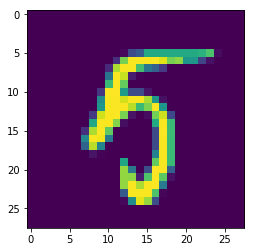

Actual:  5
Predicted:  5 

Test 58 out of 100...


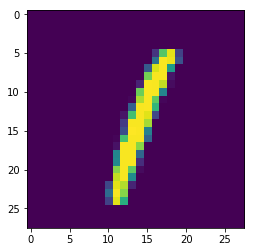

Actual:  1
Predicted:  1 

Test 59 out of 100...


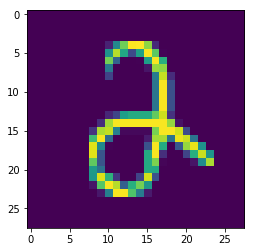

Actual:  2
Predicted:  2 

Test 60 out of 100...


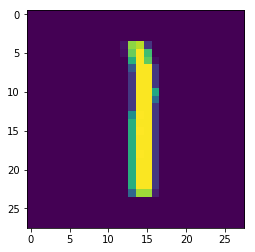

Actual:  1
Predicted:  1 

Test 61 out of 100...


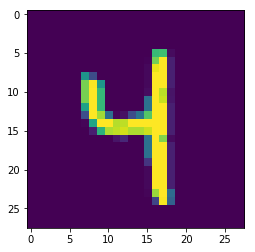

Actual:  4
Predicted:  4 

Test 62 out of 100...


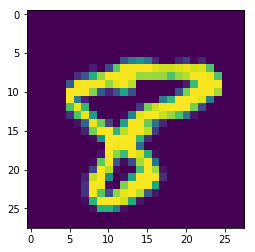

Actual:  8
Predicted:  8 

Test 63 out of 100...


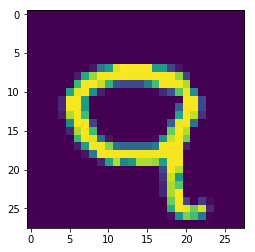

Actual:  9
Predicted:  9 

Test 64 out of 100...


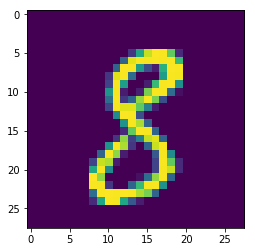

Actual:  8
Predicted:  8 

Test 65 out of 100...


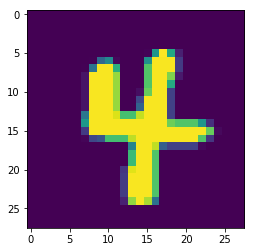

Actual:  4
Predicted:  4 

Test 66 out of 100...


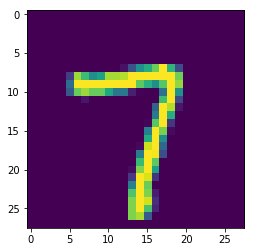

Actual:  7
Predicted:  7 

Test 67 out of 100...


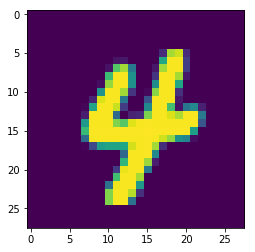

Actual:  4
Predicted:  4 

Test 68 out of 100...


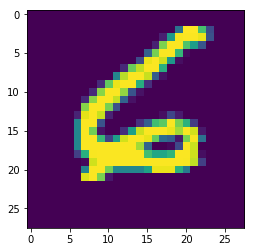

Actual:  6
Predicted:  6 

Test 69 out of 100...


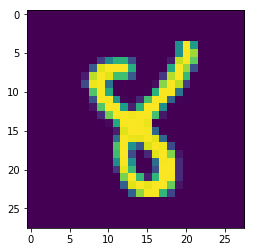

Actual:  8
Predicted:  8 

Test 70 out of 100...


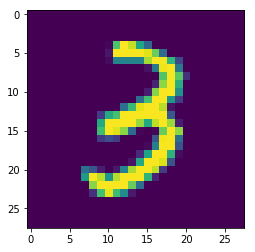

Actual:  3
Predicted:  3 

Test 71 out of 100...


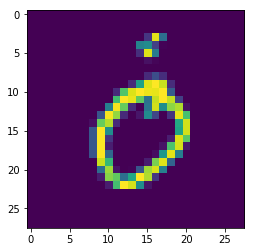

Actual:  0
Predicted:  0 

Test 72 out of 100...


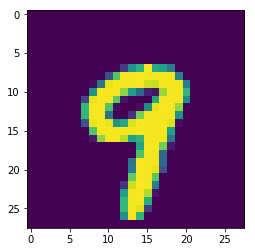

Actual:  9
Predicted:  9 

Test 73 out of 100...


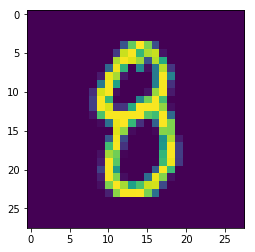

Actual:  8
Predicted:  8 

Test 74 out of 100...


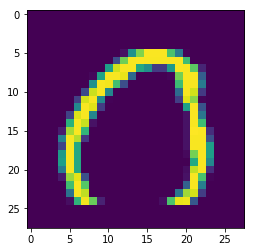

Actual:  0
Predicted:  0 

Test 75 out of 100...


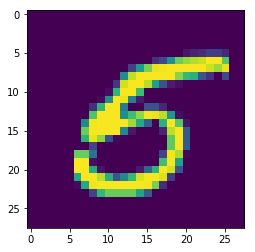

Actual:  5
Predicted:  5 

Test 76 out of 100...


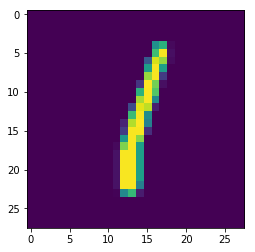

Actual:  1
Predicted:  1 

Test 77 out of 100...


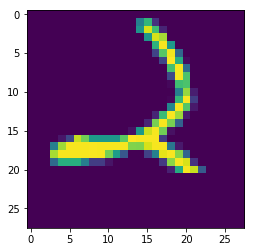

Actual:  2
Predicted:  2 

Test 78 out of 100...


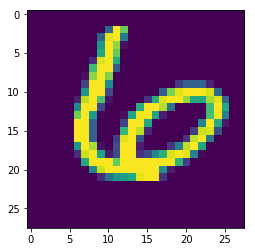

Actual:  6
Predicted:  6 

Test 79 out of 100...


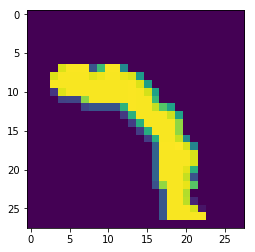

Actual:  7
Predicted:  7 

Test 80 out of 100...


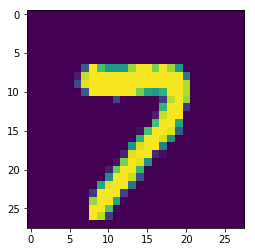

Actual:  7
Predicted:  7 

Test 81 out of 100...


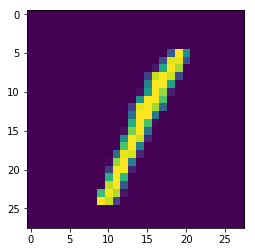

Actual:  1
Predicted:  1 

Test 82 out of 100...


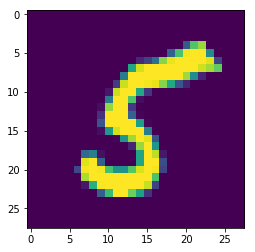

Actual:  5
Predicted:  5 

Test 83 out of 100...


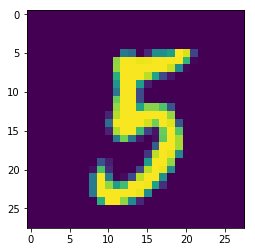

Actual:  5
Predicted:  5 

Test 84 out of 100...


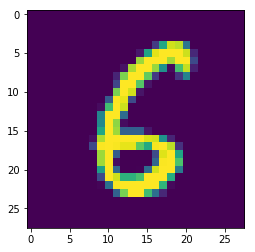

Actual:  6
Predicted:  0 

Test 85 out of 100...


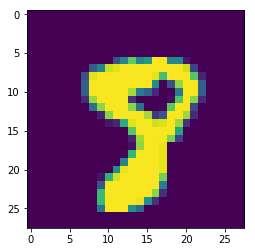

Actual:  8
Predicted:  8 

Test 86 out of 100...


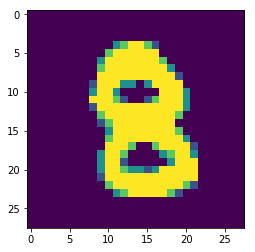

Actual:  8
Predicted:  8 

Test 87 out of 100...


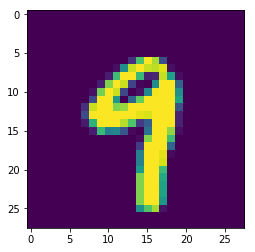

Actual:  9
Predicted:  4 

Test 88 out of 100...


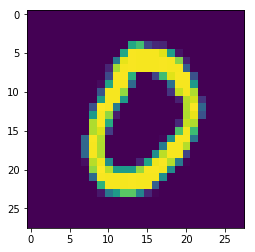

Actual:  0
Predicted:  0 

Test 89 out of 100...


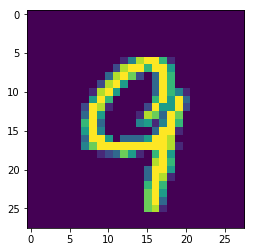

Actual:  9
Predicted:  9 

Test 90 out of 100...


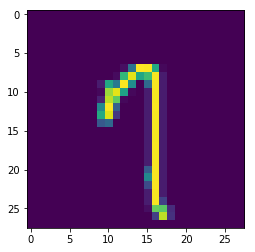

Actual:  7
Predicted:  9 

Test 91 out of 100...


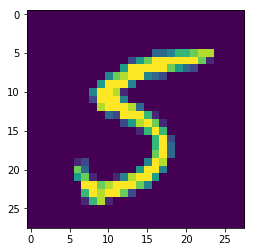

Actual:  5
Predicted:  5 

Test 92 out of 100...


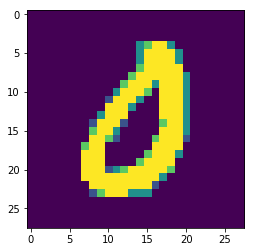

Actual:  0
Predicted:  0 

Test 93 out of 100...


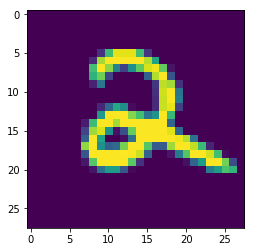

Actual:  2
Predicted:  2 

Test 94 out of 100...


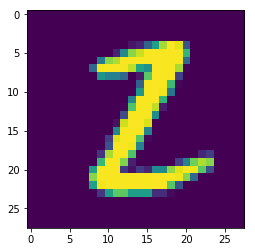

Actual:  2
Predicted:  2 

Test 95 out of 100...


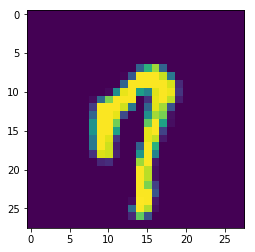

Actual:  7
Predicted:  4 

Test 96 out of 100...


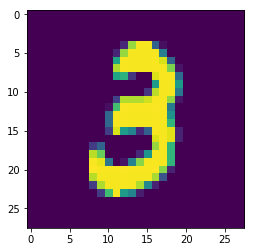

Actual:  3
Predicted:  3 

Test 97 out of 100...


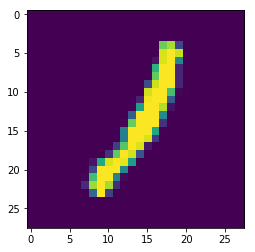

Actual:  1
Predicted:  1 

Test 98 out of 100...


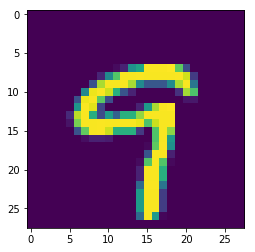

Actual:  9
Predicted:  9 

Test 99 out of 100...


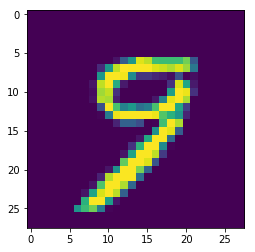

Actual:  9
Predicted:  9 

Test 100 out of 100...


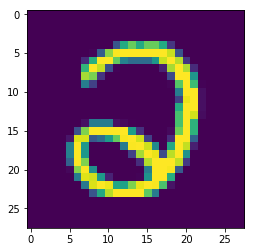

Actual:  2
Predicted:  2 

Corrects: 93


In [8]:
test_no = 100
corrects = 0

mnist_test_element = mnist_test.shuffle(50000).take(test_no)
counter = 0
for element in mnist_test_element:
  counter += 1
  print('Test {} out of {}...'.format(counter, test_no))
  image = element['image'][:,:,0]
  plt.imshow(image.numpy())
  plt.show()
  image = tf.reshape(image, [-1, 28*28])
  image = tf.cast(image, tf.float32)
  image = image / 255.
  actual = element['label'].numpy()
  print('Actual: ', actual)
  predicted = tf.argmax(model(image, W, b), 1).numpy()[0]
  print('Predicted: ', predicted,'\n')
  if predicted == actual:
    corrects-=-1
print('Corrects: {}'.format(corrects))
